In [228]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve
from sklearn import linear_model
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import scikitplot as skplt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
cd "C:/Users/Usuario/Desktop/Machine learning/project_template/data"

C:\Users\Usuario\Desktop\Machine learning\project_template\data


In [4]:
data = pd.read_csv('../data/NCDB_1999_to_2014.csv', engine = 'python', na_values=["UU", "XX", "U", "X", "QQ", "Q", "NNNN", "UUUU", "XXXX", "NN", "N" ])

**Reemplazamos los nombres de las columnas a minusculas**

In [5]:
data.columns = data.columns.map(lambda x: x[:].lower())
data

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,c_raln,c_traf,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,1999,1.0,1.0,20.0,2,2.0,34.0,NaN,1.0,5.0,3.0,3.0,1.0,6.0,1990.0,1.0,M,41.0,11.0,1.0,NaN,1.0
1,1999,1.0,1.0,20.0,2,2.0,34.0,NaN,1.0,5.0,3.0,3.0,2.0,1.0,1987.0,1.0,M,19.0,11.0,1.0,NaN,1.0
2,1999,1.0,1.0,20.0,2,2.0,34.0,NaN,1.0,5.0,3.0,3.0,2.0,1.0,1987.0,2.0,F,20.0,13.0,2.0,2.0,2.0
3,1999,1.0,1.0,8.0,2,1.0,1.0,NaN,5.0,3.0,6.0,18.0,1.0,1.0,1986.0,1.0,M,46.0,11.0,1.0,NaN,1.0
4,1999,1.0,1.0,8.0,2,1.0,1.0,NaN,5.0,3.0,6.0,18.0,99.0,NaN,NaN,1.0,M,5.0,99.0,2.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,NaN,NaN,NaN,2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,13.0,7.0,NaN,1.0,M,24.0,11.0,1.0,NaN,1.0
5860401,2014,NaN,NaN,23.0,2,1.0,6.0,5.0,1.0,1.0,NaN,18.0,1.0,14.0,2006.0,1.0,M,29.0,96.0,2.0,9.0,5.0
5860402,2014,NaN,NaN,14.0,2,1.0,2.0,1.0,1.0,5.0,4.0,18.0,1.0,1.0,2006.0,1.0,F,NaN,11.0,2.0,1.0,1.0
5860403,2014,NaN,NaN,22.0,1,1.0,6.0,1.0,2.0,4.0,NaN,18.0,1.0,22.0,NaN,1.0,M,67.0,12.0,3.0,1.0,NaN


**Vemos los valores nulos que hay en el datatset con esta funcion. Incluye todos los valores UU,QQ,NN....que hay en el datatset**

In [6]:
def access_NA(data):
    
    null_sum = data.isnull().sum()
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA
access_NA(data)

,Number of NA,Percent NA
p_safe,1234284,21.06
c_rcfg,648946,11.07
v_year,584378,9.97
c_conf,463999,7.92
c_raln,463312,7.91
p_age,395156,6.74
p_isev,371412,6.34
c_traf,305501,5.21
v_type,283111,4.83
p_sex,249740,4.26


**Hacemos target encoding a las variables que van a componer el dataset**

In [7]:
colsenc = ["p_sex", "p_safe", "c_rcfg", "v_year", "c_conf", "c_raln", "p_age", "c_traf", "v_type", "c_rsur", "c_wthr", "p_psn", 'c_vehs', 'p_user']
for i in colsenc:
    te = ce.TargetEncoder(cols=colsenc)
    data[colsenc] = te.fit_transform(data[colsenc],data.c_sev)

In [8]:
access_NA(data)

,Number of NA,Percent NA
p_isev,371412,6.34
c_hour,59409,1.01
p_id,10992,0.19
c_wday,1323,0.02
v_id,433,0.01
c_mnth,385,0.01


**Al hacer el target encoding se nos van los "Nas" de las variables a las que les hemos hecho encoding. Pero siguen quedando variables con "Nas" ya que no les hemos hecho target encoding, esto se debe a que algunas de las variables las vamos a quitar ya que no aportan información sobre la variable target (p_id,v_id). Por otro lado p_isev la quitamos porque esta muy relacionada con la variable target, hasta el punto que incluye un valor que es fatality y ese es nuestro target. Si dejamos p_isev, en todas las muestras que p_isev sea fatality, nuestro modelo predeciría fatality solo con esa variable.
Y por último eliminamos los "Nas" de las columnas c_mnth,c_wday y c_hour porque tienen muy poco porcentaje de "Nas"**

In [9]:
# Eliminamos del dataset las variables p_id y v_id porque no aportan nada a la variable target ya que son ids
data = data.drop('p_id', axis=1)
data = data.drop('v_id', axis=1)
data = data.drop('p_isev', axis=1)

In [10]:
# Quitamos los Nas restante de las variables relacionadas con el tiempo
data = data[:]
data[['c_mnth','c_wday','c_hour']] = data[['c_mnth','c_wday','c_hour']].replace('[^0-9]+',np.nan,regex=True)
data.dropna(axis=0,subset=['c_mnth','c_wday','c_hour'],inplace=True)

In [12]:
# Aqui solo cambiamos el valor númerico de las NO-FATALITIES de 2 a 0. Fatalities sigue teniendo el valor 1
data['c_sev'] = data['c_sev'].replace([2],0)

In [13]:
data

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,c_raln,c_traf,v_type,v_year,p_sex,p_age,p_psn,p_safe,p_user
0,1999,1.0,1.0,20.0,0,1.986974,1.988019,1.986047,1.984029,1.981264,1.962848,1.986508,1.975794,1.983766,1.979479,1.984830,1.985432,1.982468,1.985795
1,1999,1.0,1.0,20.0,0,1.986974,1.988019,1.986047,1.984029,1.981264,1.962848,1.986508,1.985724,1.983068,1.979479,1.981803,1.985432,1.982468,1.985795
2,1999,1.0,1.0,20.0,0,1.986974,1.988019,1.986047,1.984029,1.981264,1.962848,1.986508,1.985724,1.983068,1.987427,1.982066,1.981640,1.987219,1.979957
3,1999,1.0,1.0,8.0,0,1.971385,1.968441,1.986047,1.973294,1.981168,1.963440,1.975880,1.985724,1.980637,1.979479,1.983823,1.985432,1.982468,1.985795
4,1999,1.0,1.0,8.0,0,1.971385,1.968441,1.986047,1.973294,1.981168,1.963440,1.975880,1.973498,1.979737,1.979479,1.985924,1.971061,1.982468,1.970885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860376,2014,12.0,7.0,14.0,0,1.986974,1.981794,1.972239,1.984029,1.981264,1.986065,1.975880,1.983315,1.986157,1.979479,1.984182,1.985432,1.987219,1.985795
5860377,2014,12.0,7.0,14.0,0,1.986974,1.981794,1.972239,1.984029,1.981264,1.986065,1.975880,1.983315,1.986157,1.979479,1.985450,1.981640,1.987219,1.979957
5860378,2014,12.0,7.0,19.0,0,1.971385,1.960323,1.972239,1.984029,1.981168,1.959669,1.975880,1.985724,1.983385,1.987427,1.984683,1.985432,1.987219,1.985795
5860379,2014,12.0,7.0,19.0,0,1.971385,1.960323,1.972239,1.984029,1.981168,1.959669,1.975880,1.985724,1.983385,1.979479,1.984178,1.981640,1.987219,1.979957


**Como vimos en el EDA la variable target c_sev esta muy desbalanceada**

C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


c_sev
0    5702648
1      97545
dtype: int64

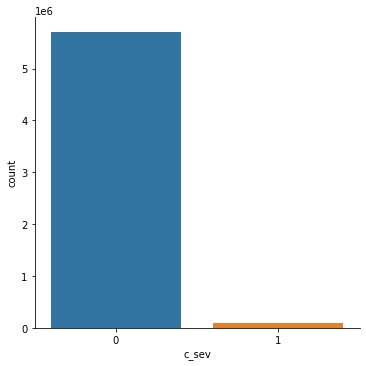

In [14]:
sns.factorplot('c_sev',data=data,kind="count")
np.unique(data['c_sev'])
data.groupby('c_sev').size()

In [15]:
# separamos la variable target del resto de variables
X = data.drop('c_sev', axis=1)
y = data.c_sev

In [16]:
# Sepraramos train de test
xtrain, xtest, ytrain, ytest = train_test_split( X, y, test_size=0.2, random_state=0)

**Aplicamos Smote para hacer oversampling de 1s y poder entrenar mejor al modelo ya que hay un gran desbalanceo en la variable target**

In [17]:
sm = SMOTE(random_state = 12345, n_jobs=-1, sampling_strategy=0.45)
X_train_oversampled, y_train_oversampled =sm.fit_resample(xtrain, ytrain)


### MODELO DE ARBOL

In [21]:
# Primer modelo para probar
Treemodel = DecisionTreeClassifier(random_state=0)

In [22]:
Treemodel.fit(X_train_oversampled, y_train_oversampled)

DecisionTreeClassifier(random_state=0)

In [23]:
Treemodel.score(xtest, ytest)

0.9657554616698232

In [24]:
tree_pred = Treemodel.predict(xtest)

**Matrices de confusión y classification report modelo arbol**

              precision    recall  f1-score   support

           0       0.99      0.98      0.98   1140522
           1       0.13      0.19      0.16     19517

    accuracy                           0.97   1160039
   macro avg       0.56      0.58      0.57   1160039
weighted avg       0.97      0.97      0.97   1160039



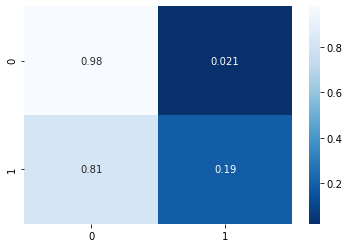

In [30]:
confm_tree = confusion_matrix(ytest, tree_pred, normalize = 'true')
sns.heatmap(confm_tree, cmap = 'Blues_r', annot = True)
print(classification_report(ytest, tree_pred))

**Curva de Roc modelo arbol**

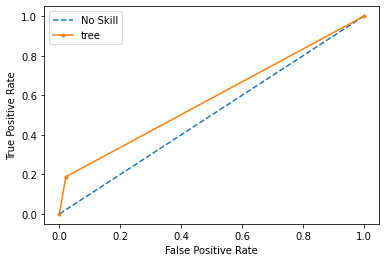

In [99]:
fpr, tpr, thresholds = roc_curve(ytest, tree_pred)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='tree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [98]:
# Guardamos modelos
pickle.dump(Treemodel, open('tree.sav', 'wb'))

### LASSO para seleccion de variables

total features: 18
selected features: 14


C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


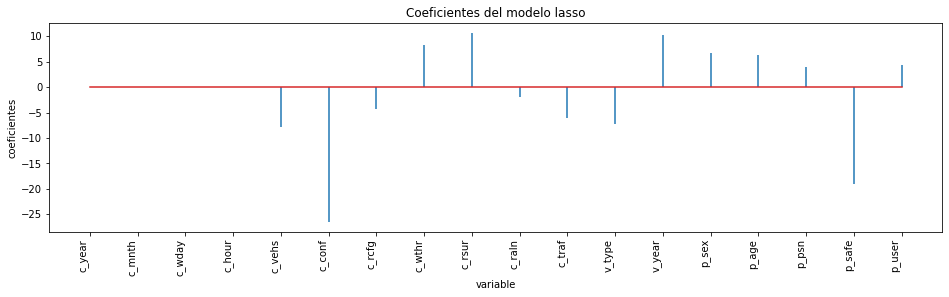

In [33]:
sel_lasso = SelectFromModel(LogisticRegression(C=1, penalty='l1', 
                                          solver='liblinear'), threshold = 0.10)
sel_lasso.fit(X_train_oversampled, y_train_oversampled)
sel_lasso.get_support()
selected_feat_lasso = X_train_oversampled.columns[sel_lasso.get_support()]
selected_feat_lasso
print('total features: {}'.format((X_train_oversampled.shape[1])))
print('selected features: {}'.format(len(selected_feat_lasso)))
df_coeficientes_lasso = pd.DataFrame(
                        {'predictor': X_train_oversampled.columns,
                         'coef': sel_lasso.estimator_.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes_lasso.predictor, df_coeficientes_lasso.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo lasso');

In [95]:
pickle.dump(sel_lasso, open('lasso.sav', 'wb'))

In [125]:
# Nuevas variables de X solo con la columnas seleccionadas por el Lasso( mismas variables quitando las relacionadas con el
# el tiempo (c_year,c_mnth,c_wday,c_hour)
xtrainlasso = X_train_oversampled[selected_feat_lasso]
xtestlasso = xtest[selected_feat_lasso]

### XGBClassifier

In [126]:
# Primer modelo tras la selección de variables
clf_xgb = xgb.XGBClassifier()

In [127]:
clf_xgb.fit(xtrainlasso, y_train_oversampled)

C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [128]:
xgb_pred = clf_xgb.predict(xtestlasso)

In [129]:
clf_xgb.score(xtestlasso, ytest)

0.9813264898852538

**Matrices de confusión y classification report modelo arbol**

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1140522
           1       0.26      0.06      0.10     19517

    accuracy                           0.98   1160039
   macro avg       0.62      0.53      0.54   1160039
weighted avg       0.97      0.98      0.98   1160039



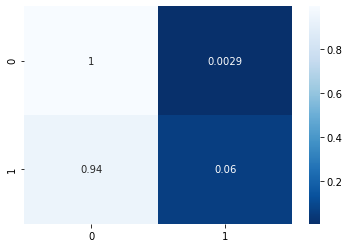

In [130]:
confm_xgb = confusion_matrix(ytest, xgb_pred, normalize = 'true')
sns.heatmap(confm_xgb, cmap = 'Blues_r', annot = True)
print(classification_report(ytest, xgb_pred))

**Seguimos teniendo problemas para predecir las muertes ya que obtenemos un fscore para muertes de 0.10**

In [96]:
# Guaramos resultado del modelo
pickle.dump(clf_xgb, open('xgb.sav', 'wb'))

**Curva de Roc**

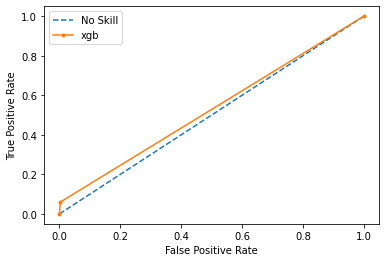

In [142]:
fpr, tpr, thresholds = roc_curve(ytest, xgb_pred)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='xgb')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

### RANDOMFOREST

In [131]:
# Hacemos randomforest aplicando mas peso a la predicción de muertes
rf3 = RandomForestClassifier(class_weight = {1:2.5, 0:0.05})

In [132]:
rf3.fit(xtrainlasso, y_train_oversampled)

RandomForestClassifier(class_weight={0: 0.05, 1: 2.5})

In [133]:
rf_pred3 = rf3.predict(xtestlasso)

In [134]:
rf3.score(xtestlasso, ytest)

0.9712483804423817

**Matrices de confusión y classification report modelo arbol**

              precision    recall  f1-score   support

           0       0.98      0.99      0.99   1140522
           1       0.11      0.10      0.10     19517

    accuracy                           0.97   1160039
   macro avg       0.55      0.54      0.54   1160039
weighted avg       0.97      0.97      0.97   1160039



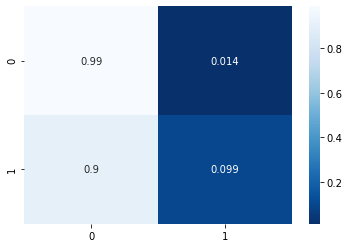

In [135]:
confm_rf = confusion_matrix(ytest, rf_pred3, normalize = 'true')
sns.heatmap(confm_rf, cmap = 'Blues_r', annot = True)
print(classification_report(ytest, rf_pred3))

**Vemos que seguimos obteniendo resultados pobres para la predicción de muertes, fscore de 0.10**

In [92]:
# Guardamos este modelo con Pickle.
pickle.dump(rf3, open('rfsel.sav', 'wb'))

**Curva de Roc**

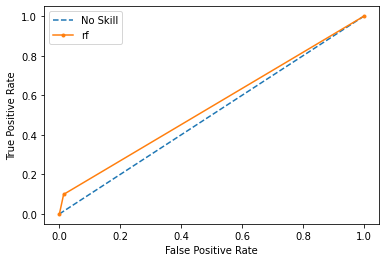

In [136]:
fpr, tpr, thresholds = roc_curve(ytest, rf_pred3)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='rf')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

### LIGHTGBM

In [137]:
lightgbm = lgb.LGBMClassifier()
lightgbm.fit(xtrainlasso, y_train_oversampled)

LGBMClassifier()

In [138]:
lightgbm.score(xtestlasso, ytest)

0.9822704236667905

In [139]:
lightgbm_pred = lightgbm.predict(xtestlasso)

**Matrices de confusión y classification report modelo arbol**

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1140522
           1       0.25      0.03      0.05     19517

    accuracy                           0.98   1160039
   macro avg       0.62      0.51      0.52   1160039
weighted avg       0.97      0.98      0.98   1160039



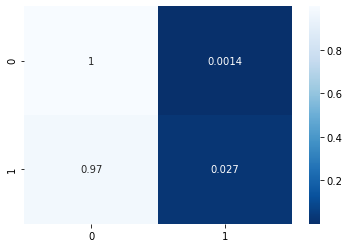

In [140]:
confm_lgbm = confusion_matrix(ytest, lightgbm_pred, normalize = 'true')
sns.heatmap(confm_lgbm, cmap = 'Blues_r', annot = True)
print(classification_report(ytest, lightgbm_pred))

**Vemos que el lightGBM también da peores resultados que el Randomforest**

In [97]:
# Guardamos modelos
pickle.dump(lightgbm, open('lgbm.sav', 'wb'))

**Curva de Roc**

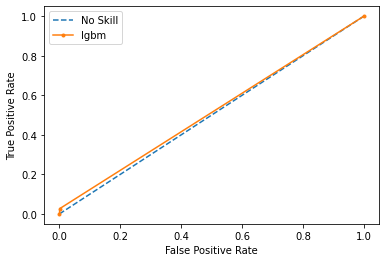

In [141]:
fpr, tpr, thresholds = roc_curve(ytest, lightgbm_pred)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='lgbm')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

### Modelo seleccionado: Randomforest

**Seleccionamos el RandomForest porque de todos los modelos que hemos probado varias veces es el que mas fscore para muertes nos ha dado**

In [143]:
# Buscamos hiperparametros, al final hemos seleccionado:
# Numero de arboles
n_estimators = [150]
# Numero de variables que tienen sentido en casa arbol
max_features = ['auto']
# Maxima profundidad del arbol
max_depth = [4]
# Creamos grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [144]:
# Mismo RandomForest que habíamos aplicado previamente
rfselec = RandomForestClassifier(random_state=0, class_weight = {1:2.5, 0:1})

In [145]:
# Hacemos RandomizedSearchCV aunque le hemos metido los parametros directamente ya que si probamos entre varios posibles
# parametros el modelo no corre. También incluimos el Cross-Validation
rfselec_random = RandomizedSearchCV(estimator = rfselec, param_distributions = random_grid, cv = 5, random_state=0, n_jobs = -1)

In [197]:
# Guardamos los ficheros en formato parquet para poder importarlos posteriormente en el notebook de explicabilidad
xtrainlasso.to_parquet('xtrainlasso.parquet')
xtestlasso.to_parquet('xtestlasso.parquet')
pd.DataFrame(y_train_oversampled).to_parquet('y_train_oversampled.parquet')
pd.DataFrame(ytest).to_parquet('ytest.parquet')

In [146]:
rfselec_random.fit(xtrainlasso, y_train_oversampled)

C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 2.5},
                                                    random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [4],
                                        'max_features': ['auto'],
                                        'n_estimators': [150]},
                   random_state=0)

In [155]:
rfselec_random.score(xtestlasso, ytest)

0.7987843512157781

In [156]:
rfselec_random_pred = rfselec_random.predict(xtestlasso)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1140522
           1       0.25      0.03      0.05     19517

    accuracy                           0.98   1160039
   macro avg       0.62      0.51      0.52   1160039
weighted avg       0.97      0.98      0.98   1160039



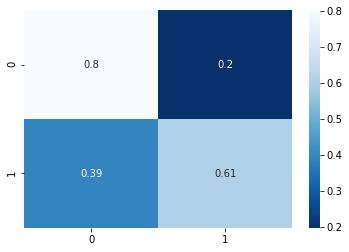

In [157]:
confm_lgbm = confusion_matrix(ytest, rfselec_random_pred, normalize = 'true')
sns.heatmap(confm_lgbm, cmap = 'Blues_r', annot = True)
print(classification_report(ytest, lightgbm_pred))

**Con el Cross-Validation, el f1score de muertes es mas bajo pero mas realista, ya que valida mejor el modelo**

**Empezamos el proceso para obtener el mejor threshold para predecir muertes, a traves de la curva de Roc**

In [158]:
# Obtenemos las probabilidades de las predicciones de la muestra de xtestlasso
prob_predictions = rfselec_random.predict_proba(xtestlasso)

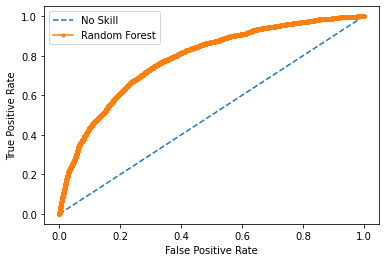

In [159]:
# Nos quedamos con las probabilidades de la prediccion de muertes
yhat = prob_predictions[:, 1]
# calculamos curva de Roc
fpr, tpr, thresholds = roc_curve(ytest, yhat)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [160]:
# calculamos media geometrica para cada threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [161]:
# Localizamos el indice con la media geometrica mas alta
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.418772, G-Mean=0.717


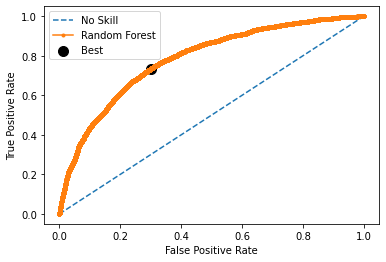

In [162]:
# Sacamos curva de roc con el mejor Threshold
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [163]:
# Calculamos curva de precision y recall
precision, recall, thresholds = precision_recall_curve(ytest, yhat)

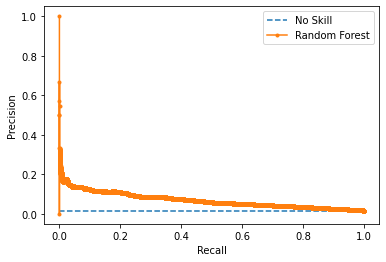

In [164]:
no_skill = len(ytest[ytest==1]) / len(ytest)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

C:\Users\Usuario\AppData\Local\Temp/ipykernel_17260/4231444270.py:2: RuntimeWarning: invalid value encountered in true_divide
  fscore = (2 * precision * recall) / (precision + recall)


Best Threshold=0.841072, F-Score=nan


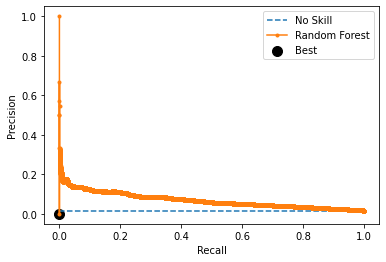

In [165]:
# convertimos a fscore
fscore = (2 * precision * recall) / (precision + recall)
# localizamos indice con mayor fscore
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

no_skill = len(ytest[ytest==1]) / len(ytest)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.scatter(recall[ix], precision[ix], s=100, marker='o', color='black', label='Best')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

**Una vez tenemos el modelo, jugamos con el threshold para ver los posibles resultados según la probabilidad que le queramos otorgar a las muertes**

              precision    recall  f1-score   support

           0       0.96      0.31      0.47   1140522
           1       0.01      0.25      0.01     19517

    accuracy                           0.31   1160039
   macro avg       0.48      0.28      0.24   1160039
weighted avg       0.94      0.31      0.47   1160039



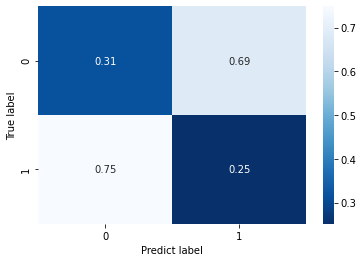

In [237]:
threshold1 = 0.41
y_pred = (rfselec_random.predict_proba(xtestlasso)[:, 1] < threshold).astype('float')
cm1 = confusion_matrix(ytest, y_pred, normalize = 'true')
sns.heatmap(cm1, cmap = 'Blues_r', annot = True)
plt.ylabel("True label")
plt.xlabel("Predict label")
print(classification_report(ytest, y_pred))

**En este primer ejemplo de arriba con threshold 0.41, es decir, que todas las probabilidades superiores a 0.41 serán consideradas muertes, vemos que el fscore de muertes es bajo(0.01)y a la vez nos bajan los resultados de la predicción de de no-muertes. Para el threshold 0.41, hay un 31% de True positive(no-muertes que predecimos como no-muertes) y un 69% de False negative(son no-muertes pero predecimos muertes). Por otro lado tenemos un 75% de False positive(Son muertes pero predecimos que son no-muertes) y un 25% de True negatives(Son muertes y predecimos muertes)**

              precision    recall  f1-score   support

           0       0.89      0.02      0.03   1140522
           1       0.01      0.87      0.03     19517

    accuracy                           0.03   1160039
   macro avg       0.45      0.44      0.03   1160039
weighted avg       0.87      0.03      0.03   1160039



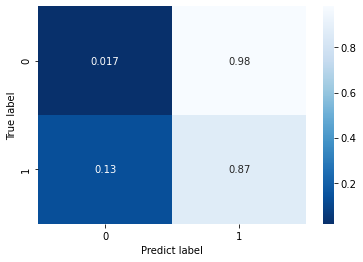

In [239]:
threshold2 = 0.70
y_pred2 = (rfselec_random.predict_proba(xtestlasso)[:, 1] < threshold2).astype('float')
cm2 = confusion_matrix(ytest, y_pred2, normalize = 'true')
sns.heatmap(cm2, cmap = 'Blues_r', annot = True)
plt.ylabel("True label")
plt.xlabel("Predict label")
print(classification_report(ytest, y_pred2))

**En este segundo ejemplo con threshold 0.70, es decir, que todas las probabilidades superiores a 0.70 serán consideradas muertes, vemos que el fscore de muertes ha aumentado a un 0.03 y a la vez nos baja mucho mas los resultados de la predicción de de no-muertes. Para el threshold 0.70, hay un 1.7% de True positive(no-muertes que predecimos como no-muertes) y un 98% de False negative(son no-muertes pero predecimos muertes). Por otro lado tenemos un 13% de False positive(Son muertes pero predecimos que son no-muertes) y un 87% de True negatives(Son muertes y predecimos muertes)**

**Como conclusion viendo como varián los resultados según el threshold aplicado, si nos queremos centrar en la predicción de muertes, habría que aplicar un threshold alto (0.70 por ejemplo). Pero de esa manera el modelo asume que en cualquier accidente puede haber muertes. Es decir, acertamos la predicción de muertes por esa asunción de que en todos los accidentes hay muertes. Por otro lado si queremos un modelo de predicción de muertes sin bajar la predicción de no-muertes, nos es imposible predecir las muertes. Puede ser porque no conseguimos unas variables lo suficientemente explicativas como para predecir las muertes**

In [196]:
pickle.dump(rfselec_random, open('rfselec_random.sav', 'wb'))

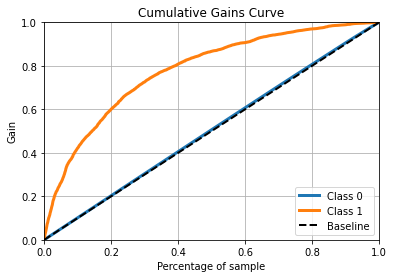

In [229]:
# Curva de ganancias
skplt.metrics.plot_cumulative_gain(ytest, prob_predictions)
plt.show()

**En este gráfico vemos la distribución de las probabilidades de las muertes(de mayor a menor) a lo largo de la muestra, pero para el problema que intentamos resolver en este modelo(predecir muertes), no vemos relevante saber que en el primer 20% de la muestra se encuentran el 60% de muertes**

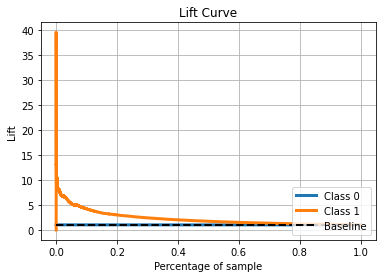

In [230]:
# Curva lift
skplt.metrics.plot_lift_curve(ytest, prob_predictions)
plt.show()

**En el eje x de este gráfico tenemos el porcentaje de la población y se ordena de probabilidad más alta a más baja, es decir, primero las probabilidades mas altas de ser muertes.
En el eje y tenemos hasta que punto es mejor nuestro modelo que el modelo predictivo aleatorio**

**Con el 20% de la muestra que mas se acerque a ser muerte, nuestro modelo predice aproximadamente 2 veces mejor las muertes, que un modelo aleatorio**